# Baltimore Data Classification Modeling

### by: Tristan Dewing

## Importing Packages and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
balt = pd.read_csv("../data/processed/processed.csv")
balt = balt.dropna()
balt.head()

,...1,callDate,priority,district,description,callNumber,incidentLocation,Lat,Long,timeOfDay
0,11,2015-07-13,Non-Emergency,CD,FOLLOWUP,P151941014,1500 PENNSYLVANIA AV,39.302243,-76.633075,10.866667
1,16,2015-07-13,Medium,SE,DISORDERLY,P151941020,3300 E FAYETTE ST,39.295066,-76.570896,10.900000
2,17,2015-07-13,Low,SE,INVESTIGATE,P151941021,3300 E FAYETTE ST,39.295066,-76.570896,10.883333
3,20,2015-07-13,Low,NE,OTHER,P151941024,1600 STONEWOOD RD,39.348760,-76.587609,10.900000
4,22,2015-07-13,Medium,WD,BURGLARY,P151941026,1600 BRUCE CT,39.306700,-76.645785,10.900000


## Exploring Most Frequent Descriptions for Each Priority Level

In [3]:
balt.priority.value_counts()

Medium            349987
Low               192766
Non-Emergency      49706
High               28316
Out of Service        88
Emergency              9
Name: priority, dtype: int64

In [4]:
des_counts = balt.description.groupby(balt.priority).value_counts()

In [5]:
des_counts['Low'][:10]

description
OTHER          64888
INVESTIGATE    55474
LARCENY        28090
TRANSPORT      23998
INVEST          6750
ESCORT          2304
NOTIFY          2020
MISTAKE         1043
DWI              857
BAILOUT          708
Name: description, dtype: int64

In [6]:
des_counts['Medium'][:10]

description
DISORDERLY      249226
BURGLARY         58416
UNFOUNDED        17318
PROSTITUTION      6398
INVESTIGATE       5250
DWI               3770
LARCENY           1524
INVEST            1262
OTHER             1140
POSSIBLE           906
Name: description, dtype: int64

In [7]:
des_counts['High'][:10]

description
FIRE          10361
SHOOTING       5522
GAMBLING       3546
CUTTING        3064
CARJACKING     1648
PROWLER        1272
UNFOUNDED      1160
POSSIBLE        262
DISORDERLY      224
OTHER           142
Name: description, dtype: int64

In [8]:
des_counts['Non-Emergency'][:10]

description
OTHER        25303
FOLLOWUP     15202
COURT         4125
TRANSPORT     1825
C              778
G              630
J              370
ESCORT         348
D              222
E              222
Name: description, dtype: int64

In [9]:
des_counts['Emergency'][:10]

description
OTHER       8
POSSIBLE    1
Name: description, dtype: int64

In [10]:
des_counts['Out of Service'][:10]

description
LARCENY       25
OTHER         23
BURGLARY      15
DISORDERLY     5
TRANSPORT      5
UNFOUNDED      4
R              3
TOWED          2
AUTO           1
CARJACKING     1
Name: description, dtype: int64

## Tokenizing Description and Priority Variables

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
balt["n_priority"] = le.fit_transform(balt.priority)
balt["n_description"] = le.fit_transform(balt.description)
balt.head()

,...1,callDate,priority,district,description,callNumber,incidentLocation,Lat,Long,timeOfDay,n_priority,n_description
0,11,2015-07-13,Non-Emergency,CD,FOLLOWUP,P151941014,1500 PENNSYLVANIA AV,39.302243,-76.633075,10.866667,4,154
1,16,2015-07-13,Medium,SE,DISORDERLY,P151941020,3300 E FAYETTE ST,39.295066,-76.570896,10.900000,3,98
2,17,2015-07-13,Low,SE,INVESTIGATE,P151941021,3300 E FAYETTE ST,39.295066,-76.570896,10.883333,2,205
3,20,2015-07-13,Low,NE,OTHER,P151941024,1600 STONEWOOD RD,39.348760,-76.587609,10.900000,2,266
4,22,2015-07-13,Medium,WD,BURGLARY,P151941026,1600 BRUCE CT,39.306700,-76.645785,10.900000,3,54


## Constructing Naive Bayes Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = balt[["n_description"]]
y = balt["n_priority"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Accuracy: 79.514%


/Users/tristan/DSU-Client-Socian-Project/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


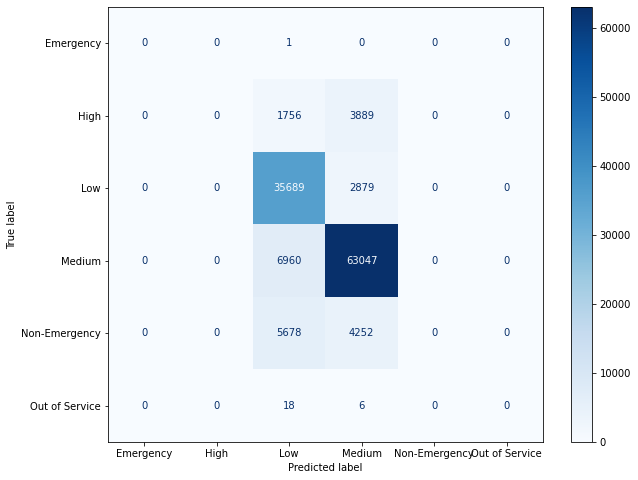

In [13]:
from sklearn.metrics import plot_confusion_matrix
labels = np.array(['Emergency', 'High', 'Low', 'Medium', 'Non-Emergency', 'Out of Service'])
print(f"Accuracy: {gnb.score(X_test, y_test) * 100:.3f}%")
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(gnb, X_test, y_test, display_labels = labels, ax = ax, cmap = plt.cm.Blues)
plt.show()

## Constructing Multinomial Naive Bayes Classifier

Accuracy: 56.378%


/Users/tristan/DSU-Client-Socian-Project/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


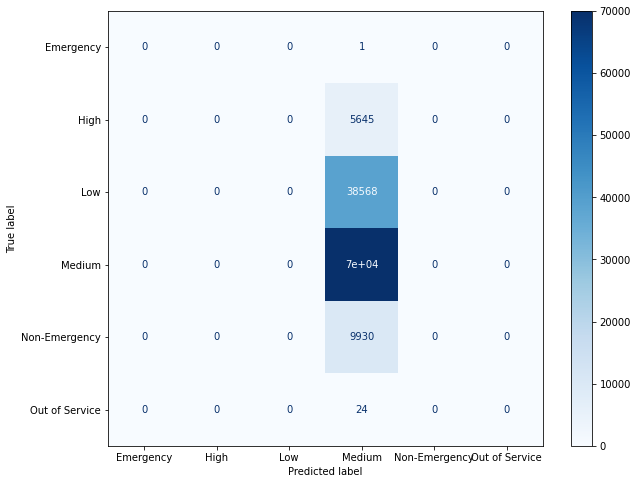

In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print(f"Accuracy: {mnb.score(X_test, y_test) * 100:.3f}%")
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(mnb, X_test, y_test, display_labels = labels, ax = ax, cmap = plt.cm.Blues)
plt.show()

## Constructing Categorical Naive Bayes Classifier

Accuracy: 92.791%


/Users/tristan/DSU-Client-Socian-Project/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


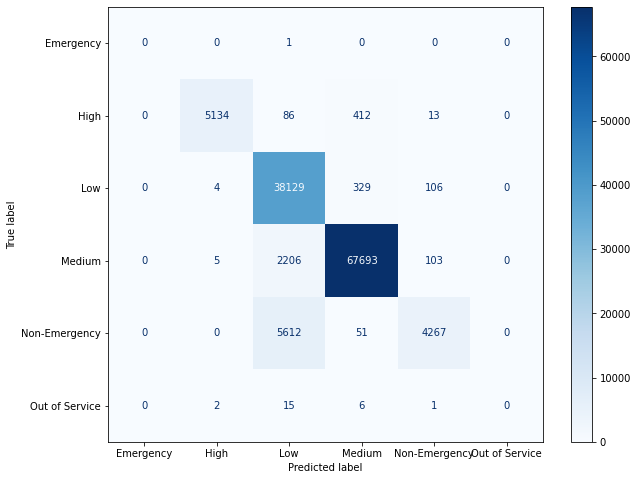

In [15]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
print(f"Accuracy: {cnb.score(X_test, y_test) * 100:.3f}%")
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(cnb, X_test, y_test, display_labels = labels, ax = ax, cmap = plt.cm.Blues)
plt.show()